In [2]:
#pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

movs_df = pd.read_csv('desktop/independant_projects/Movie_score_predictor/IMDb_finalized.csv')

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0


In [4]:
movs_df.dtypes

imdb_title_id            object
title                    object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

Year is already an integer. I want a numeric month column, so I'm going to need to process the date_published column to get the month. I'll need to loop through the column and split the date strings and then append the middle value to a data structure - probably just a list. 

In [5]:
#set up list
months = []

for date in movs_df['date_published']:
    date_list = date.split('-')
    months.append(date_list[1])

movs_df['month_published'] = months

movs_df = movs_df.astype({'month_published':'int64'})

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0,10
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0,12
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0,8
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0,11
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0,3


In [6]:
movs_df.dtypes

imdb_title_id            object
title                    object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
month_published           int64
dtype: object

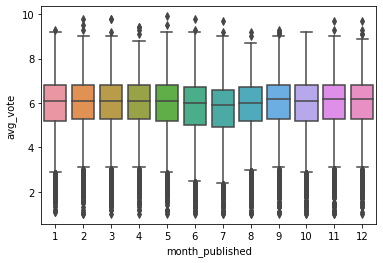

In [7]:
#is there any relationship between avg_vote and month_published?


sns.boxplot(x = movs_df['month_published'], y= movs_df['avg_vote'], data = movs_df)

plt.show()

From the figure above, I can tell that there isn't really a correlation between the time of year and the quality. Also, that may not be the most graceful way to plot that data. In my last analysis we found a correlation between the genre designation and quality perception. Now I want to deconvolute the genre lables and engineer 3 new features - primary genre, subgenre, and genre complexity. Genre complexity will be defined as the number of genre labels. 

In [8]:
gen1 = []
gen2 = []
gen3 = []
gen_c = []

#the purpose of this for loop is to unpack 'genre' into several columns for better analysis
for genre in movs_df['genre']:
    gen_list = genre.split(',')
    gen1.append(gen_list[0])
    gen_c.append(len(gen_list))
    if len(gen_list) > 1:
        gen2.append(gen_list[1])
    else:
        gen2.append('none')
    if len(gen_list) > 2:
        gen3.append(gen_list[2])
    else:
        gen3.append('none')

movs_df['primary_genre'] = gen1

movs_df['subgenre1'] = gen2

movs_df['subgenre2'] = gen3

movs_df['genre_complexity'] = gen_c

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,primary_genre,subgenre1,subgenre2,genre_complexity
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0,10,Romance,none,none,1
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0,12,Biography,Crime,Drama,3
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0,8,Drama,none,none,1
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0,11,Drama,History,none,2
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0,3,Adventure,Drama,Fantasy,3


In [9]:
#what does the genre complexity score look like for the data set?

movs_df['genre_complexity'].describe()

count    85855.000000
mean         2.048419
std          0.822677
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: genre_complexity, dtype: float64

In [10]:
#group by primary genre to see how many there are, and learn something about average scores

av_by_primary = movs_df.groupby('primary_genre').mean()

av_by_primary

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,genre_complexity
primary_genre,,,,,,,,
Action,1995.822935,107.124938,5.577409,21309.559432,88.730610,40.823070,6.523231,2.648990
Adult,1979.000000,96.500000,4.550000,689.500000,19.000000,40.000000,3.500000,3.000000
Adventure,1983.408447,99.118366,5.869881,14099.572103,61.460684,30.511335,6.788552,2.602390
Animation,2003.297438,87.363852,6.386575,22352.414611,63.784837,42.177348,6.832543,2.801708
Biography,1995.306725,113.995646,6.638413,21488.999516,79.317629,55.842918,6.382680,2.676826
Comedy,1993.215294,97.938799,5.877100,6435.003251,32.299340,21.617829,6.578796,1.975758
Crime,1986.485874,98.111931,6.103743,11601.185892,52.208388,29.605362,6.575490,2.608062
Documentary,2000.000000,88.500000,7.300000,615.500000,9.000000,11.500000,5.500000,2.000000
Drama,1994.035571,102.907508,6.268865,5617.644213,32.398164,22.677048,6.589656,1.687072


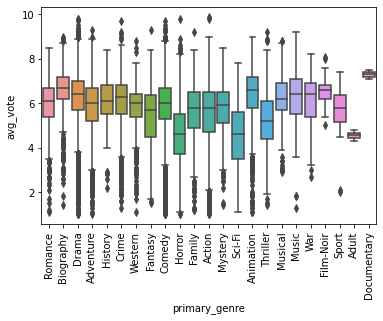

In [11]:
#violin plots using primary genre

gen1_scr = movs_df[['primary_genre', 'avg_vote']].copy()

sns.boxplot(x='primary_genre', y='avg_vote', data = gen1_scr)

plt.xticks(rotation = 90)

plt.show()

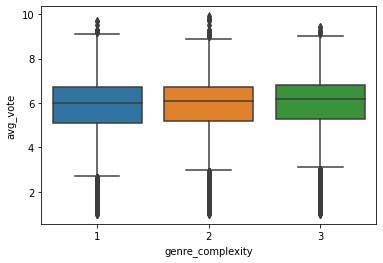

In [12]:
#boxplots with genre complexity

sns.boxplot(x='genre_complexity', y='avg_vote', data = movs_df)

plt.show()

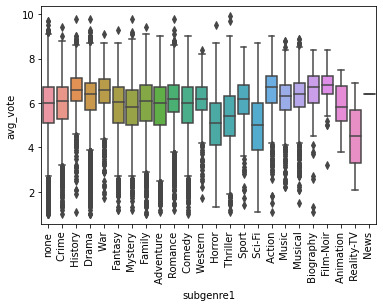

In [13]:
#boxplots with secondary genre

sns.boxplot(x='subgenre1', y='avg_vote', data = movs_df)
plt.xticks(rotation = 90)
plt.show()

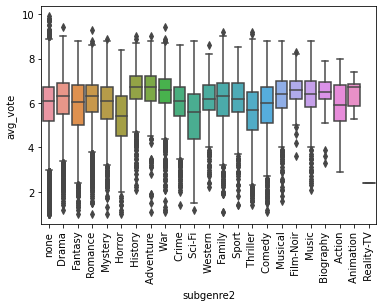

In [14]:
sns.boxplot(x='subgenre2', y='avg_vote', data = movs_df)
plt.xticks(rotation = 90)
plt.show()

In [15]:
#how many directors are in the set?

directs = movs_df.groupby('director').mean()

directs = directs.sort_values(by = ['avg_vote'], ascending = False)

directs.head(20)

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,genre_complexity
director,,,,,,,,
Msn Surya,2019.0,120.0,9.9,896.0,NaN,2.0,5.0,2.0
Basheed S.K.,2017.0,121.0,9.8,926.0,2.0,1.0,3.0,2.0
Abner Official,2020.0,87.0,9.8,133.0,NaN,NaN,3.0,2.0
Sampath Rudra,2019.0,129.0,9.8,527.0,NaN,NaN,6.0,2.0
Aalmist Subba,2020.0,150.0,9.8,130.0,114.0,NaN,2.0,2.0
Manoj Nair,2019.0,121.0,9.7,473.0,20.0,NaN,11.0,1.0
Trinadh Velisila,2020.0,86.0,9.7,1126.0,502.0,NaN,7.0,2.0
Zahir Raihan,1970.0,150.0,9.4,1794.0,11.0,2.0,4.0,3.0
Anthony Bawn,2019.0,62.0,9.3,1173.0,5.0,NaN,12.0,3.0


In [16]:
#look at countries

countries = movs_df.groupby('country').mean()

countries = countries.sort_values(by = ['avg_vote'], ascending = False)

countries.head()

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,genre_complexity
country,,,,,,,,
"Republic of North Macedonia, Poland",1997.0,102.0,8.5,390.0,3.0,1.0,8.0,2.0
"USA, UK, Malta, Morocco",2000.0,155.0,8.5,1308193.0,2653.0,213.0,5.0,3.0
"UK, France, Poland, Germany, USA",2002.0,150.0,8.5,707942.0,937.0,157.0,10.0,3.0
"Romania, France, Italy",1971.0,203.0,8.4,6035.0,19.0,6.0,2.0,3.0
"Lebanon, USA, France, Cyprus, Qatar, UK",2018.0,126.0,8.4,53506.0,335.0,184.0,4.0,1.0


In [17]:
country_arr = movs_df['country'].to_numpy()

type(country_arr[0])

str

In [18]:
# I am going to try to disentangle nationality a bit first step is to make a column called US_envolvement 1 is yes, 0 is no
us_involve = []

ctr = 0

for cry in country_arr:
    if type(country_arr[ctr]) != str:
        country_arr[ctr] = 'unknown'
    ctr = ctr + 1


#this loop uses a counter to keep track of position in the dataframe
#the value at the counter is set to 0 by default
#the countries are also split, and if USA is found the value is changed to 1
#this will work if the country designations are consistent.
#I have written this as a function so that I can make new feilds for other countries.

def country_involvement(country, array):
    #starts a counter at 0
    counter = 0
    #loops through my array version of the country column
    for cry in country_arr:
        #appends a 0 to initialize the array value of the output array
        array.append(0)
        #for the next part it splits the countries into a list
        #looks for the given country name, and replaces the 0 with a 1 if found
        c_list = cry.split(',')
        for c in c_list:
            if c == country:
                array[counter] = 1
                
        #move counter to the next number
        counter = counter + 1

country_involvement('USA', us_involve)
    
print(f'The number of rows in movs_df is {len(movs_df)}')
print(f'The number of entries in us_involve is {len(us_involve)}')
print(country_arr)


The number of rows in movs_df is 85855
The number of entries in us_involve is 85855
['USA' 'Australia' 'Germany, Denmark' ... 'India' 'Turkey' 'Spain']


In [19]:
#make us_involve a column in the dataframe

movs_df['US_involvement'] = us_involve

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,primary_genre,subgenre1,subgenre2,genre_complexity,US_involvement
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0,10,Romance,none,none,1,1
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0,12,Biography,Crime,Drama,3,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0,8,Drama,none,none,1,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0,11,Drama,History,none,2,1
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0,3,Adventure,Drama,Fantasy,3,0


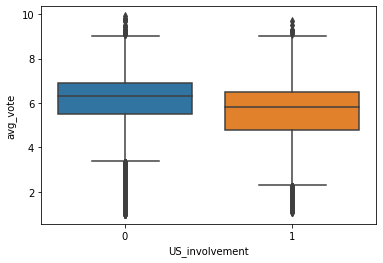

In [20]:
sns.boxplot(x='US_involvement', y='avg_vote', data = movs_df)

plt.show()

In [21]:
#try the same thing for india
india_involve = []

country_involvement('India', india_involve)

movs_df['india_involvement'] = india_involve

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,primary_genre,subgenre1,subgenre2,genre_complexity,US_involvement,india_involvement
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0,10,Romance,none,none,1,1,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0,12,Biography,Crime,Drama,3,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0,8,Drama,none,none,1,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0,11,Drama,History,none,2,1,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0,3,Adventure,Drama,Fantasy,3,0,0


In [22]:
japan_involve = []

country_involvement('Japan', japan_involve)

movs_df['japan_involvement'] = japan_involve

movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,reviews_from_users,reviews_from_critics,month_published,primary_genre,subgenre1,subgenre2,genre_complexity,US_involvement,india_involvement,japan_involvement
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,1.0,2.0,10,Romance,none,none,1,1,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,7.0,7.0,12,Biography,Crime,Drama,3,0,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,...,5.0,2.0,8,Drama,none,none,1,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,25.0,3.0,11,Drama,History,none,2,1,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,31.0,14.0,3,Adventure,Drama,Fantasy,3,0,0,0


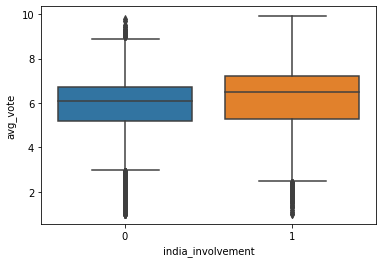

In [23]:
sns.boxplot(x='india_involvement', y='avg_vote', data = movs_df)

plt.show()

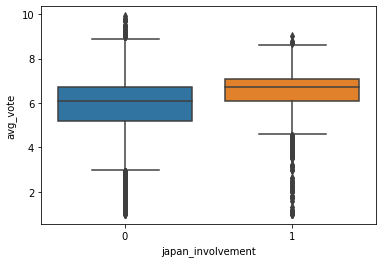

In [24]:
sns.boxplot(x='japan_involvement', y='avg_vote', data = movs_df)

plt.show()

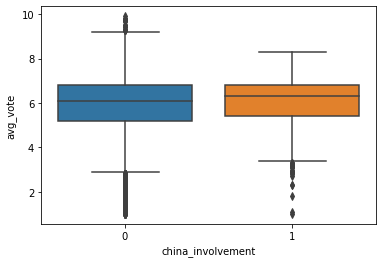

In [25]:
china_involve = []

country_involvement('China', china_involve)

movs_df['china_involvement'] = china_involve

sns.boxplot(x='china_involvement', y='avg_vote', data = movs_df)

plt.show()

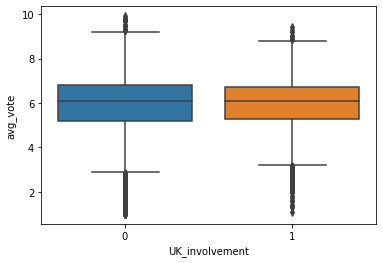

In [26]:
UK_involve = []

country_involvement('UK', UK_involve)

movs_df['UK_involvement'] = UK_involve

sns.boxplot(x='UK_involvement', y='avg_vote', data = movs_df)

plt.show()

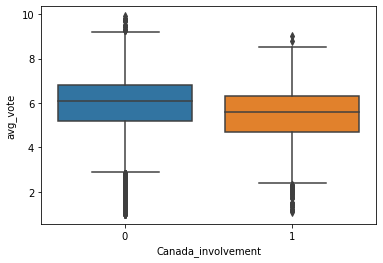

In [27]:
canada_involve = []

country_involvement('Canada', canada_involve)

movs_df['Canada_involvement'] = canada_involve

sns.boxplot(x='Canada_involvement', y='avg_vote', data = movs_df)

plt.show()

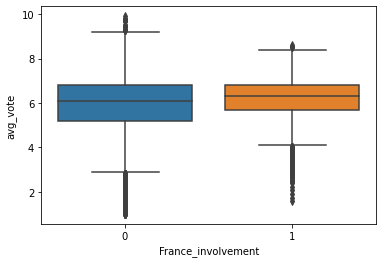

In [28]:
france_involve = []

country_involvement('France', france_involve)

movs_df['France_involvement'] = france_involve

sns.boxplot(x='France_involvement', y='avg_vote', data = movs_df)

plt.show()

In [29]:
movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,subgenre1,subgenre2,genre_complexity,US_involvement,india_involvement,japan_involvement,china_involvement,UK_involvement,Canada_involvement,France_involvement
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,none,none,1,1,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,Crime,Drama,3,0,0,0,0,0,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,...,none,none,1,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,History,none,2,1,0,0,0,0,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,Drama,Fantasy,3,0,0,0,0,0,0,0


In [30]:
#fill in NaN values in language


for lan in range(len(movs_df['language'])):
    if type(movs_df['language'][lan]) != str:
        movs_df['language'][lan] = 'None'

movs_df.head()

C:\Users\gspah\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,subgenre1,subgenre2,genre_complexity,US_involvement,india_involvement,japan_involvement,china_involvement,UK_involvement,Canada_involvement,France_involvement
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,none,none,1,1,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,Crime,Drama,3,0,0,0,0,0,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,5.8,...,none,none,1,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,History,none,2,1,0,0,0,0,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,Drama,Fantasy,3,0,0,0,0,0,0,0


In [31]:
movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,subgenre1,subgenre2,genre_complexity,US_involvement,india_involvement,japan_involvement,china_involvement,UK_involvement,Canada_involvement,France_involvement
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,none,none,1,1,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,Crime,Drama,3,0,0,0,0,0,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,5.8,...,none,none,1,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,History,none,2,1,0,0,0,0,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,Drama,Fantasy,3,0,0,0,0,0,0,0


In [32]:
langs = movs_df.groupby('language').mean()

langs.sort_values(by=['avg_vote'], ascending = False)

langs

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,month_published,genre_complexity,US_involvement,india_involvement,japan_involvement,china_involvement,UK_involvement,Canada_involvement,France_involvement
language,,,,,,,,,,,,,,,
Aboriginal,2015.000000,104.000000,6.900000,4033.000000,23.0000,62.000000,5.000000,3.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
"Aboriginal, English",1999.750000,96.000000,5.825000,1861.500000,33.7500,29.750000,6.500000,2.750000,0.0,0.0,0.0,0.0,0.25,0.0,0.0
"Aboriginal, Japanese, Hokkien",2011.000000,138.000000,7.450000,3880.000000,11.0000,60.000000,9.000000,3.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
"Aboriginal, Portuguese",2007.000000,97.000000,6.800000,180.000000,3.0000,8.000000,5.000000,1.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
Afrikaans,2011.833333,106.277778,6.327778,263.111111,7.5625,5.461538,5.722222,1.944444,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zulu, English",2006.000000,97.000000,6.700000,2826.000000,43.0000,6.000000,10.000000,1.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
"Zulu, English, Afrikaans",2013.000000,97.000000,6.800000,204.000000,6.0000,19.000000,3.000000,2.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
"Zulu, English, Hindi",2011.000000,100.000000,7.000000,240.000000,5.0000,21.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [33]:
#I am going to deconvolute language using similar techniques to country involvement. I will engineer 3 - 4 features based on the 
#presence of major languages in the film

langs_arr = movs_df['language'].to_numpy()

def lang_presence(language, array):
    count = 0
    for lng in langs_arr:
        array.append(0)
        lng = lng.strip()
        lng_list = lng.split(',')
        for l in lng_list:
            if l == language:
                array[count] = 1
        count = count + 1

eng_lang = []

lang_presence('English', eng_lang)

eng_lang

movs_df['English_presence'] = eng_lang
                    
movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,subgenre2,genre_complexity,US_involvement,india_involvement,japan_involvement,china_involvement,UK_involvement,Canada_involvement,France_involvement,English_presence
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,none,1,1,0,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,Drama,3,0,0,0,0,0,0,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,5.8,...,none,1,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,none,2,1,0,0,0,0,0,0,1
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,Fantasy,3,0,0,0,0,0,0,0,0


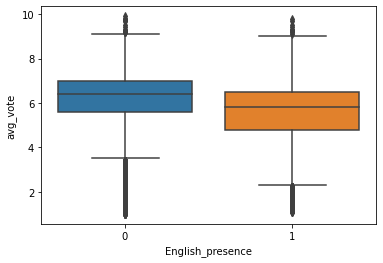

In [34]:
sns.boxplot(x='English_presence', y='avg_vote', data = movs_df)

plt.show()

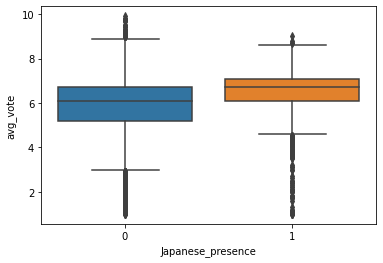

In [35]:
#same but for Japanese langauge

jpn_lng = []

lang_presence('Japanese', jpn_lng)

movs_df['Japanese_presence'] = jpn_lng

sns.boxplot(x='Japanese_presence', y='avg_vote', data = movs_df)

plt.show()


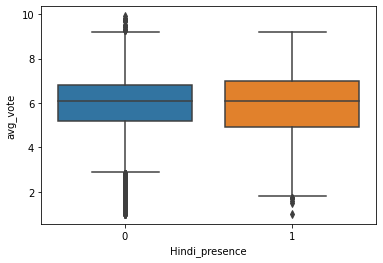

In [36]:
#now with hindi

hnd_lng = []

lang_presence('Hindi', hnd_lng)

movs_df['Hindi_presence'] = hnd_lng

sns.boxplot(x='Hindi_presence', y='avg_vote', data = movs_df)

plt.show()

In [37]:
#how many of each of these?

print(f'There are {sum(eng_lang)} movies with english in them')
print(f'There are {sum(jpn_lng)} movies with japanese in them')
print(f'There are {sum(hnd_lng)} movies with hindi in them')

There are 42779 movies with english in them
There are 3168 movies with japanese in them
There are 2571 movies with hindi in them


There are 5353 movies with french in them


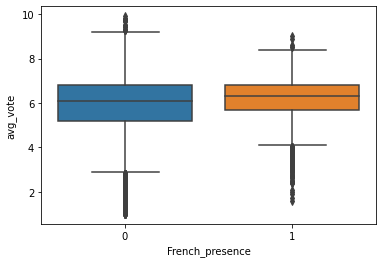

In [38]:
# now french

frn_lng = []

lang_presence('French', frn_lng)

print(f'There are {sum(frn_lng)} movies with french in them')

movs_df['French_presence'] = frn_lng

sns.boxplot(x='French_presence', y='avg_vote', data = movs_df)

plt.show()

There are 1665 movies with russian in them


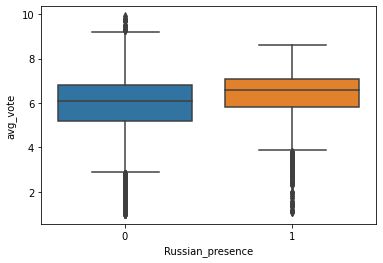

In [39]:
#russian

russ_lng = []

lang_presence('Russian', russ_lng)

print(f'There are {sum(russ_lng)} movies with russian in them')

movs_df['Russian_presence'] = russ_lng

sns.boxplot(x='Russian_presence', y='avg_vote', data = movs_df)

plt.show()

There are 2403 movies with german in them


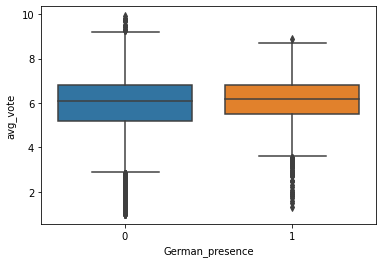

In [40]:
#german
ger_lng = []

lang_presence('German', ger_lng)

print(f'There are {sum(ger_lng)} movies with german in them')

movs_df['German_presence'] = ger_lng

sns.boxplot(x='German_presence', y='avg_vote', data = movs_df)

plt.show()


There are 1138 movies with korean in them


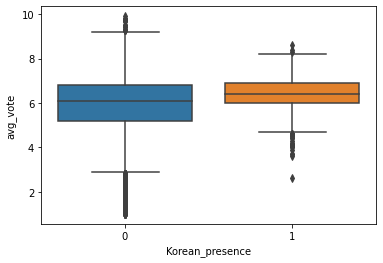

In [41]:
#Korean
kor_lng = []

lang_presence('Korean', kor_lng)

print(f'There are {sum(kor_lng)} movies with korean in them')

movs_df['Korean_presence'] = kor_lng

sns.boxplot(x='Korean_presence', y='avg_vote', data = movs_df)

plt.show()


In [42]:
movs_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,UK_involvement,Canada_involvement,France_involvement,English_presence,Japanese_presence,Hindi_presence,French_presence,Russian_presence,German_presence,Korean_presence
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,0,0,0,0,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,0,0,0,0,0,0,0,0,0,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,5.8,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,0,0,0,1,0,0,0,0,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,0,0,0,0,0,0,0,0,0,0


Features that will not work for audience disposition models: Hindi Presence, UK involvement, Genre complexity. 

Columns that cannot be used as features for a predictive model: Review columns, IMDb id, title, date_published, Genre, Country, Language, director. 


In [43]:
# create new metric = is_liked
#is_liked is true if avg_vote is above 6. 

is_liked = []

for vote in movs_df['avg_vote']:
    if vote > 6:
        is_liked.append(1)
    else:
        is_liked.append(0)

movs_df['is_liked'] = is_liked

movs_df.head()
    

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,Canada_involvement,France_involvement,English_presence,Japanese_presence,Hindi_presence,French_presence,Russian_presence,German_presence,Korean_presence,is_liked
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,0,0,0,0,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,0,0,0,0,0,0,0,0,0,1
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,5.8,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,0,0,1,0,0,0,0,0,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
#write out dataframe for prediction

predictor_df = movs_df.drop(columns = ['imdb_title_id', 'title', 'date_published', 'country', 'language', 'director', 
                                       'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics', 'genre_complexity',
                                      'Hindi_presence', 'UK_involvement', 'primary_genre', 'subgenre1', 'subgenre2'])

predictor_df.head()

,year,genre,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,Japanese_presence,French_presence,Russian_presence,German_presence,Korean_presence,is_liked
0,1894,Romance,45,10,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1906,"Biography, Crime, Drama",70,12,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1911,Drama,53,8,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1912,"Drama, History",100,11,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1911,"Adventure, Drama, Fantasy",68,3,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
#I need to code binary columns for genres
#first, I need a list of all the genres

g1 = movs_df['primary_genre'].to_numpy()

g2 = movs_df['subgenre1'].to_numpy()

g3 = movs_df['subgenre2'].to_numpy()

g4 = np.concatenate([g1, g2])

genres = np.concatenate([g3, g4])

genres = np.unique(genres)

genres



array([' Action', ' Adventure', ' Animation', ' Biography', ' Comedy',
       ' Crime', ' Drama', ' Family', ' Fantasy', ' Film-Noir',
       ' History', ' Horror', ' Music', ' Musical', ' Mystery', ' News',
       ' Reality-TV', ' Romance', ' Sci-Fi', ' Sport', ' Thriller',
       ' War', ' Western', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'none'], dtype=object)

In [46]:
#get only the ones without a space at the beginning, omit "none"

g_clean = []

for g in range(23, 46):
    g_clean.append(genres[g])

g_clean

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [47]:
# now I need to loop through that list and loop through each term to look for it in the genre column of predictor
# when I find it, I need to add it to a list, and finally I need to add it to a column in the predictor dataframe

for g in g_clean:
    #initialize an array and a counter
    g_array = []
    g_counter = 0
    
    #loop through the genre column of predictor_df
    for gen in predictor_df['genre']:
        
        #initialize the value of each entry at 0
        g_array.append(0)
        
        #git rid of white space in genre list
        gen = gen.strip()
        
        #split out the genres and make a list
        gen_list = gen.split(',')
        
        #loop through the genres to see if entry g is there
            
        for genr in gen_list:
            if genr == g:
                #change the value to 1 if found
                g_array[g_counter] = 1
        
        g_counter = g_counter + 1
        
    #g_array is populated, so add it to predictor_df as a new column
    
    predictor_df[g] = g_array
    
    print(f'added {g}')
    

predictor_df.head()      
        
    

added Action
added Adult
added Adventure
added Animation
added Biography
added Comedy
added Crime
added Documentary
added Drama
added Family
added Fantasy
added Film-Noir
added History
added Horror
added Music
added Musical
added Mystery
added Romance
added Sci-Fi
added Sport
added Thriller
added War
added Western


,year,genre,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1894,Romance,45,10,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1906,"Biography, Crime, Drama",70,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1911,Drama,53,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1912,"Drama, History",100,11,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1911,"Adventure, Drama, Fantasy",68,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
predictor_df = predictor_df.drop(columns = ['genre'])

predictor_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1894,45,10,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#write out predictor_df
#predictor_df.to_csv('desktop/independant_projects/movie_score_predictor/ML_dataset1.csv', index= False)

# Some Exploration of Votes column with respect to our feature set

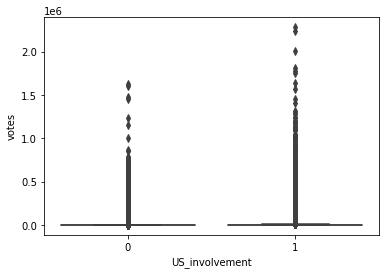

In [50]:
sns.boxplot(x='US_involvement', y='votes', data = movs_df)

plt.show()

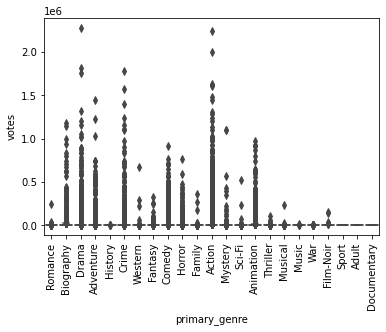

In [61]:
sns.boxplot(x='primary_genre', y='votes', data = movs_df)
plt.xticks(rotation = 90)
plt.show()

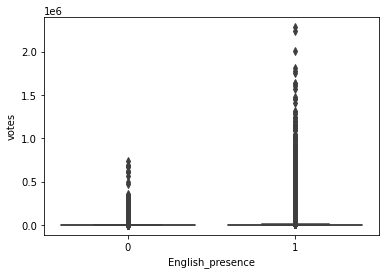

In [53]:
sns.boxplot(x='English_presence', y='votes', data = movs_df)

plt.show()

In [54]:
#describe votes

movs_df['votes'].describe()

count    8.585500e+04
mean     9.493490e+03
std      5.357436e+04
min      9.900000e+01
25%      2.050000e+02
50%      4.840000e+02
75%      1.766500e+03
max      2.278845e+06
Name: votes, dtype: float64

In [58]:
#what is the median number of votes a movie gets?
from statistics import median

votes = movs_df['votes'].to_numpy()

print(f' the median votes a movie gets is {median(votes)}')



 the median votes a movie gets is 484


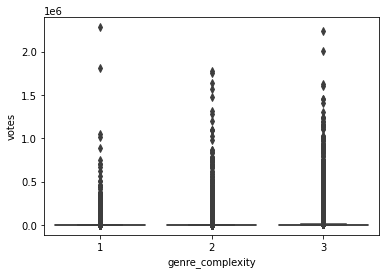

In [62]:
#genre complexity

#boxplots with genre complexity

sns.boxplot(x='genre_complexity', y='votes', data = movs_df)

plt.show()

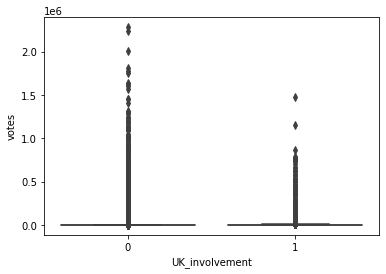

In [63]:
#UK involvement

sns.boxplot(x='UK_involvement', y='votes', data = movs_df)

plt.show()

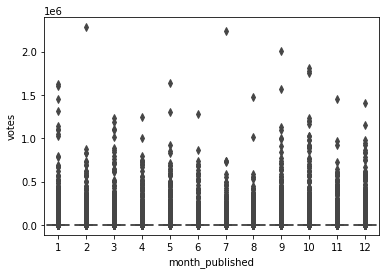

In [64]:
sns.boxplot(x = movs_df['month_published'], y= movs_df['votes'], data = movs_df)

plt.show()

In [66]:
#creating a new category for votes: is_outlier threashold set at about 1.5x iqr

is_outlier = []

for vote in movs_df['votes']:
    if vote > 2250:
        is_outlier.append(1)
    else:
        is_outlier.append(0)

movs_df['is_outlier'] = is_outlier

movs_df.head()


,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,...,France_involvement,English_presence,Japanese_presence,Hindi_presence,French_presence,Russian_presence,German_presence,Korean_presence,is_liked,is_outlier
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,...,0,0,0,0,0,0,0,0,0,0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,...,0,0,0,0,0,0,0,0,1,0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",None,Urban Gad,5.8,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,...,0,1,0,0,0,0,0,0,0,0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
#how many outliers are there?

movs_df['is_outlier'].sum()

19084

In [72]:
#groupby is_outlier

outies = movs_df.groupby('is_outlier').sum()

outies.T

is_outlier,0,1
year,133035988.0,38116031.0
duration,6572226.0,2043445.0
avg_vote,382974.7,123454.4
votes,34660823.0,780402727.0
reviews_from_users,589917.0,3013146.0
reviews_from_critics,497087.0,1538026.0
month_published,440070.0,125980.0
genre_complexity,129336.0,46531.0
US_involvement,21388.0,9522.0
india_involvement,5018.0,1171.0


In [73]:
#second groupby for is outlier
outies2 = movs_df.groupby('is_outlier').median()

outies2.T

is_outlier,0,1
year,2002.0,2004.0
duration,95.0,102.0
avg_vote,6.0,6.6
votes,323.0,8135.5
reviews_from_users,6.0,65.0
reviews_from_critics,5.0,48.0
month_published,6.0,7.0
genre_complexity,2.0,3.0
US_involvement,0.0,0.0
india_involvement,0.0,0.0


In [ ]:
#Start making a new df for outlier prediction